# Hermite Interpolation

We want to smoothly interpolate between control points.
There are many interpolation algorithms, such as spline interpolation, but in this page I want to focu on Hermite interpolation.

Hermite Interpolation can find a polynomial passes through given point with given velocity.

Suppose that we have a set of points and velocities as given below.

$$
S = \{(x_i, f(x_i), f'(x_i)|i=1,2,...,n\}
$$

For $n$ given points, we can find polynomial of order $2n-1$ that satisfies the constraints.
Let's call it $H_{2n-1}$.

$$
H_{2n-1}(x) = \sum_{i=1}^{2n-1} a_i x^i
$$

The constraints can be written as:

\begin{align}
H_{2n-1}(x_i) &= f(x_i) \\
H_{2n-1}'(x_i) &= f'(x_i) & (i&=1,2,...,n)
\end{align}


## Piecewise Cubic Hermite Interpolation

ref: https://astro.temple.edu/~dhill001/course/NUMANAL_FALL2016/Section%20Lectures/Section5_7_Hermite%20Interpolation.pdf

We want to simply split a whole path into sections between two points,

$$
S_i = \left\{\left(x_i, f(x_i), f'(x_i)\right), \left(x_{i+1}, f(x_{i+1}), f'(x_{i+1})\right)\right\}
$$

and apply cubic Hermite interpolation at that section.
Because we use common derivative between neighboring sections, we can guarantee $C^1$ continuity on the whole path.

We can use an easier version of $H_3$ to simplify calculations later.

$$
p(x) = a(x - x_0)^3 + b(x - x_0)^2 + c(x - x_0) + d
$$

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.special

In [38]:
#x = np.arange(-1,1.01,0.01).reshape((-1,1))

def f_params(x1, x2, vx1, vx2):
    h = 1.
    d = x1
    c = vx1
    r = x2 - x1 - h * vx1
    s = vx2 - vx1
    a = (h * s - 2 * r) / h ** 3
    b = (-h * s + 3 * r) / h ** 2
    return a, b, c, d, r, s

def f_x(t, *params):
    a, b, c, d, _, _ = f_params(*params)
    return a * t ** 3 + b * t ** 2 + c * t + d
#     return ((2 * x1 + 2 * x2 + vx1 + vx2) * t ** 3
#             + (-3 * x1 + 3 * x2 -2 * vx1 + 2 * vx2) * t ** 2
#             + vx1 * t + x1)

a: 0.0, b: -500.0, c: 0, d: 500, s: -500.0, r: -1000
a: 0.0, b: 500.0, c: -1000, d: 0, s: 500.0, r: 1000
a: 0.0, b: 500.0, c: 0, d: -500, s: 500.0, r: 1000


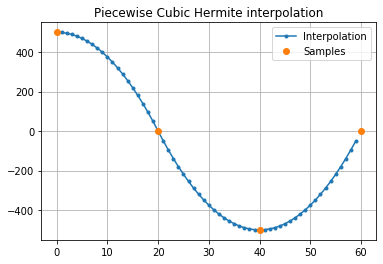

In [50]:
t0 = [0, 20, 40, 60]
x0 = [500, 0, -500, 0]
v0 = [0, -1000, 0, 1000]

x, y = [], []
t = 0
for i in range(len(t0)-1):
    print(", ".join(["{}: {}".format(name, val) for name, val in
           zip(["a", "b", "c", "d", "s", "r"], f_params(x0[i], x0[i+1], v0[i], v0[i+1]))]))
    for j in range(t0[i], t0[i+1]):
        x.append(t)
        f = float(t - t0[i]) / (t0[i+1] - t0[i])
        y.append(f_x(f, x0[i], x0[i+1], v0[i], v0[i+1]))
        #print(f, y[-1])
        t += 1

plt.plot(x, y, '.-')
plt.plot(t0, x0, 'o')
plt.title("Piecewise Cubic Hermite interpolation")
plt.legend(["Interpolation", "Samples"])
plt.grid()

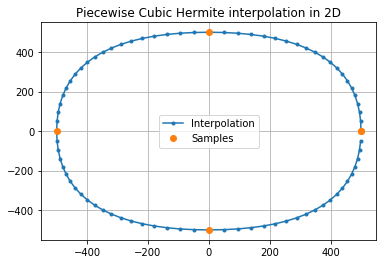

In [52]:
t0 =  [   0,    20,    40,   60,   80]
x0 =  [ 500,     0,  -500,    0,  500]
y0 =  [   0,   500,     0, -500,    0]
vx0 = [   0, -1000,     0, 1000,    0]
vy0 = [1000,     0, -1000,    0, 1000]


x, y = [], []
t = 0
for i in range(len(t0)-1):
    for j in range(t0[i], t0[i+1]):
        f = float(t - t0[i]) / (t0[i+1] - t0[i])
        x.append(f_x(f, x0[i], x0[i+1], vx0[i], vx0[i+1]))
        y.append(f_x(f, y0[i], y0[i+1], vy0[i], vy0[i+1]))
        #print(f, y[-1])
        t += 1

plt.plot(x, y, '.-')
plt.plot(x0, y0, 'o')
plt.title("Piecewise Cubic Hermite interpolation in 2D")
plt.legend(["Interpolation", "Samples"])
plt.grid()